## Partie 1

In [1]:
# coding: utf8
# IMPORTATION DES PACKAGES PYTHON

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from pysal.common import *

import numpy as np
import pysal
import diagnostics
from pysal.spreg.ols import BaseOLS as OLS

import pysal.spreg as pyspreg

% matplotlib inline

> ### 1. Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [2]:
DF_raw = pd.read_csv('mroz.raw.csv', sep=';', header = None,  encoding = 'utf-8')
DF_raw.columns = ['inlf','hours','kidslt6','kidsge6','age','educ','wage','repwage','hushrs','husage','huseduc','huswage','faminc','mtr',
                  'motheduc','fatheduc','unem','city','exper','nwifeinc','lwage','expersq'] 

In [3]:
DF = DF_raw
# Prétraitement des valeurs nulles pour wages
DF['wage'] = DF['wage'].replace('.', 0.0).astype(float)

# Sélection des observations avec des revenus strictement positifs
DF = DF[DF['wage']>0]
print str(DF.shape[0])+" observations après filtrage"
print '\n**** Illustration d une des obervations ****'
print DF.iloc[0]

428 observations après filtrage

**** Illustration d une des obervations ****
inlf               1
hours           1610
kidslt6            1
kidsge6            0
age               32
educ              12
wage           3.354
repwage         2.65
hushrs          2708
husage            34
huseduc           12
huswage       4.0288
faminc         16310
mtr           0.7215
motheduc          12
fatheduc           7
unem               5
city               0
exper             14
nwifeinc    10.91006
lwage       1.210154
expersq          196
Name: 0, dtype: object


> ### 2. Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon puis, pour les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon

In [4]:
DF_high = DF[DF['huswage']>DF['huswage'].median()]
DF_low = DF[DF['huswage']<=DF['huswage'].median()]

In [5]:
# Creation d'une fonction d'affichage des 3 distributions (salaire, age et éducation), pour chacune des 3 populationsconsidérées
def samples_distribution(df, name):
    distrib = pd.DataFrame()
    transition = pd.DataFrame(['________________'], index = ['___________________'])
    wages = pd.DataFrame(['*****************'], index = ['*******WAGES******'])
    age = pd.DataFrame(['*****************'], index = ['********AGE********'])
    education = pd.DataFrame(['*****************'], index = ['*****EDUCATION*****'])
    
    distrib = pd.concat([transition,
                         wages,
                         df['wage'].describe(),
                         transition,
                         age,
                         df['age'].describe(),
                         transition,
                         education,
                         df['educ'].describe(),
                         transition])
    distrib.columns = [name]
    return distrib

In [6]:
print 'TOTAL POPULATION : 428 femmes' 
print 'POPULATION HIGH : FEMMES DONT LE SALAIRE DU MARI EST SUPERIEUR A LA MEDIANE DE L_ECHANTILLON ('+str(DF_high.shape[0])+' femmes)'
print 'POPULATION LOW : FEMMES DONT LE SALAIRE DU MARI EST INFERIEUR A LA MEDIANE DE L_ECHANTILLON ('+str(DF_high.shape[0])+' femmes)\n'

All_distrib = pd.concat([samples_distribution(DF,'TOTAL POPULATION'),
                         samples_distribution(DF_high,'POPULATION HIGH'),
                         samples_distribution(DF_low,'POPULATION LOW')], axis = 1)
print All_distrib


TOTAL POPULATION : 428 femmes
POPULATION HIGH : FEMMES DONT LE SALAIRE DU MARI EST SUPERIEUR A LA MEDIANE DE L_ECHANTILLON (214 femmes)
POPULATION LOW : FEMMES DONT LE SALAIRE DU MARI EST INFERIEUR A LA MEDIANE DE L_ECHANTILLON (214 femmes)

                      TOTAL POPULATION    POPULATION HIGH     POPULATION LOW
___________________   ________________   ________________   ________________
*******WAGES******   *****************  *****************  *****************
count                              428                214                214
mean                          4.177682           4.896822           3.458541
std                           3.310282           4.041606           2.143274
min                             0.1282             0.1616             0.1282
25%                             2.2626            2.51385           2.117275
50%                             3.4819             3.8464             2.9718
75%                            4.97075           5.854125        

> ### 3. Faire l'histogramme de la variable wage. Calculer le log de wage et faire l'histogramme. Comparez les deux histogrammes et commentez

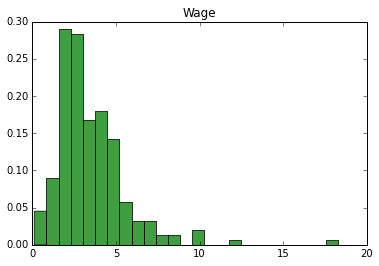

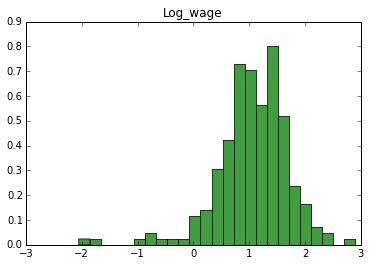

In [7]:
plt.figure(1)
a = plt.hist(DF_low['wage'], 25, normed=1, facecolor='g', alpha=0.75)
plt.title('Wage')
plt.figure(2)
b = plt.hist(np.log(DF_low['wage']), 25, normed=1, facecolor='g', alpha=0.75)
plt.title('Log_wage')

# TODO : Afficher les titres des graphiques

*** Commentaire :  le passage au logarithme permet de se rapprocher d'une distribution gaussienne ***

> ### 4. Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de multi- collinéarité si l'on utilise ces variables comme variables explicatives ? S'agit-il d'un effet "toute chose étant égale par ailleurs ?

In [8]:
print "Corrélation des variables 'motheduc' et 'fatheduc' : "+str(np.corrcoef(DF['motheduc'], DF['fatheduc'])[0][1])

Corrélation des variables 'motheduc' et 'fatheduc' : 0.554063218431


***Les 2 variables 'motheduc' et 'fatheduc' sont faiblement corrélées (< 80 %). On n'aura donc a priori pas de problème de multicolinéarité si on utilise les deux comme variables explicatives (pas de problème de non-inversibilité de matrice)***

> ### 5.	Faites un graphique en nuage de point entre wage et educ, wage et exper, wage et fatheduc. Commentez. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

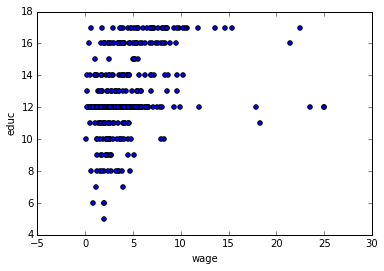

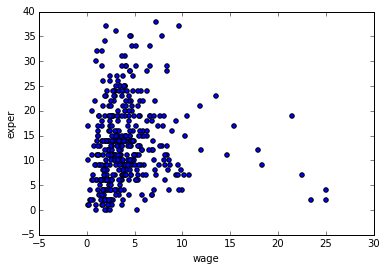

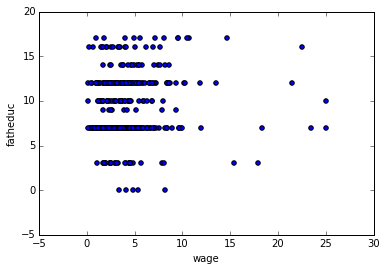

In [9]:
# Wage - Educ
plt.figure(1)
plt.scatter(DF['wage'],DF['educ'])
plt.xlabel('wage')
plt.ylabel('educ')

# Wage - Exper
plt.figure(2)
plt.scatter(DF['wage'],DF['exper'])
plt.xlabel('wage')
plt.ylabel('exper')

# Wage - fatheduc
plt.figure(3)
plt.scatter(DF['wage'],DF['fatheduc'])
plt.xlabel('wage')
plt.ylabel('fatheduc')

***Commentaires :***

*** 1. On constate que les variables d'éducation varient de manière discrètes ( ce qui explique les graphiques sous forme de 'lignes')***

***2. Graphe WAGE / EDUC : Il semble être possible de régresser linéairement le salaire par l'éducation (trouver une droite qui approxime l'espérance de salaire en fonction du niveau d'éducation).***<br>
***Cependant, nous avons un phénomène d'hétéroscédasticité : la variance du revenu dépend fortement du nombre d'années d'expériences: ***
- pour une expérience faible -> salaires faibles, avec une faible dispersion
- pour une expérience élevée -> forte dispersion  de salaires

***3. Graphes WAGE / EXPERIENCE et WAGE / FATHEDUC : Pas évident de dire quelque chose pour ces graphiques ***

*** 4. L'effet observé n'est pas 'toutes choses égales par ailleurs'. En effet, on ne regarde ici les variables que deux à deux, mais entre deux observations les valeurs des variables non visualisées peuvent être différentes ***

> ### 6.	Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? Expliquer le biais de variable omise

***L'hypothèse fondamentale qui garantit des estimateurs non-biaisés est la non corrélation entre les variables observées et les variables non-observées.***

***En effet, on peut montrer que, si on oublie d’inclure une variable explicative qui est corrélée avec une ou plusieurs autres variables explicatives, nous introduisons un biais dans l’estimation de nos paramètres. (l'esspérance de l'erreur sur l'estimation du paramètre dépend d'un terme croisé entre la variable oubliée et les variables avec lesquelles elle est corrélée).***

***Ce cas particulier est appelé : biais de variables omises.***

# > ### 7.	Faire la régression de wage en utilisant les variables explicatives un constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus. 

In [10]:
results = smf.ols("wage ~ city + educ + exper + nwifeinc + kidslt6 + kidsge6", data = DF).fit()
print(results.summary())
print ('\n')
print 'SSR: ', results.ssr

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     10.23
Date:                Sun, 10 May 2015   Prob (F-statistic):           1.41e-10
Time:                        19:03:15   Log-Likelihood:                -1090.0
No. Observations:                 428   AIC:                             2194.
Df Residuals:                     421   BIC:                             2222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.4035      0.963     -2.495      0.0

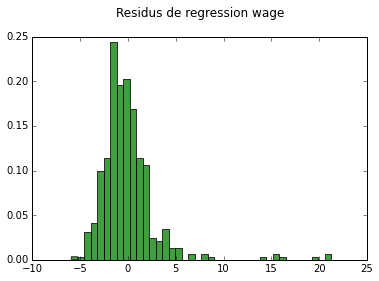

In [11]:
# Plot de l'histogramme des résidus
res = plt.hist(results.resid, 40, normed=1, facecolor='g', alpha=0.75)
plt.title('Residus de regression wage \n')

***Commentaire :  On constate une non-normalité des résidus de régression (distribution avec une queue trop épaisse)
Les estimateurs obtenus par la méthode des moindres carrés ne sont donc pas optimaux.***
***D'autre part, dans ce contexte, les tests et calculs de variance ou d'intervalles de confiance ou de prédiction sont généralement faux.***
***Les résidus étant plus dispersés qu'une loi normale, on ne peut pas ignorer ces problèmes.***

> ### 8.	Faire la régression de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l’histogramme des résidus.

In [14]:
DF =  DF.drop(['log_wage'],axis=1)
DF['log_wage']=DF['wage'].apply(lambda x : np.log(x))

results_log_wage = smf.ols("log_wage ~ city + educ + exper + nwifeinc + kidslt6 + kidsge6", data = DF).fit()
print ('Regression parameters\n')
print(results_log_wage.summary())

print ('\n')
print 'SSR: ', results_log_wage.ssr

Regression parameters

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 10 May 2015   Prob (F-statistic):           2.00e-13
Time:                        19:07:51   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.3990      0.

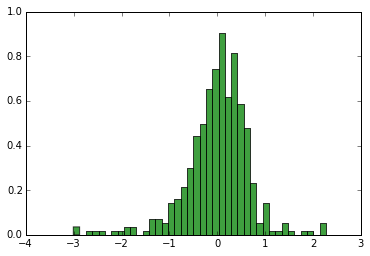

In [15]:
# Plot des résidus
plt.figure(1)
res = plt.hist(results_log_wage.resid, 40, normed=1, facecolor='g', alpha=0.75)

***Commentaire :***

***Le passage au log permet de rapprocher la distribution des résidus d'une loi normale***
*** La distribution des résidus étant visiblement 'inclue dans une gaussienne'*** ***, et le nombre d'observation étant significatif, on pourra réaliser les tests et calculs d'intervalles de confiance à partir de cette régression.***

> ### 9.	Tester l'hypothèse de non significativité de exper avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values

*** On cherche à tester que le coefficient relatif à l'expérience est nul. Il s'agit donc d'un test de student, avec une hypothèse H0 : 'le coefficient relatif à l'expérience est nul' ***

In [16]:
print "** coefficients de régression de log_wage associé à exper (rappel) **"
print results_log_wage.params['exper']

print "\n ** Test de la non-significativité du coefficient **\n"
# Calcul de la statistique de Student associée au coefficient de l'experience
student_test = results_log_wage.params['exper']/ results_log_wage.bse['exper']
print 'Resultat du test de Student : '+str(student_test)
student_law = stats.t(421)
p_value = student_law.cdf(-student_test)+ 1 - student_law.cdf(student_test)
print 'p-Value : '+str(p_value)

# Autre méthode (calcul direct par Python)
#print results_log_wage.pvalues['exper']

** coefficients de régression de log_wage associé à exper (rappel) **
0.0154878708067

 ** Test de la non-significativité du coefficient **

Resultat du test de Student : 3.45171805756
p-Value : 0.000613365572396


*** Commentaire : ***<br>
*** On obtient une p-value de ~ 6.1e-4. Cela nous conduit donc à rejeter l'hypothèse de non-significativité de l'expérience, et cela pour un test à 1%, 5% ou 10%. (la p-value est inférieure à ces 3 seuils)***

> ### 9bis - Tester l’hypothèse que le coefficient associé à educ est égal à 10% avec un seuil de significativité de 5% (test à alternatif des deux côtés)

*** On réalise donc un test de Student sur le coefficient associé à educ, avec l'hypothèse nulle H0 : 'le coefficient est égal à 0.1' ***

In [17]:
print "** Test de Student avec H0 : 'le coefficient associé à educ = 0.1 **"
print "p-value : "+str(results_log_wage.t_test("educ = 0.1").pvalue)

** Test de Student avec H0 : 'le coefficient associé à educ = 0.1 **
p-value : 0.88176227807


*** On obtient une p-value d'environ 88%. On accepte donc  à 1%, 5% ou 10% l'hypothèse que le coefficient associé à educ est égal à 10%. ***

> ### 10.	De combien augmente wage avec 10 années d’expérience ?

In [18]:
print results_log_wage.params.exper * 10

0.154878708067


*** Lorsque l'expérience augmente de 10 année, Wage augmente 10 * coeff(exper) %.
On trouve une augmentation de 15,5% ***

> ### 11.	Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.

In [19]:
# Test de Fischer
constraint = "kidslt6 = kidsge6"
#print results_log_wage.f_test(constraint)
print "** Test de Fischer (H0 : coeff(kidslt6) = coeff(kidsge6)) **\n"
#print  "Valeur de la statistique de Fischer : " +str(results_log_wage.f_test(constraint).fvalue[0][0])

print  'p-value : ' + str(results_log_wage.f_test(constraint).pvalue)

** Test de Fischer (H0 : coeff(kidslt6) = coeff(kidsge6)) **

p-value : 0.710268070738


*** La p-value est de 71 %. On accepte à 5% l'hypothèse H0 d'égalité des coefficients associés aux variables kidsgt6 et kidslt6.***


*** Une autre méthode pour tester l'hypothèse consiste à réaliser un changement de variable et de faire un test de Student : ***
- on pose :Theta = coeff(kidslt6) - coeff(kidsge6)
- on effectue un changement de variable kidsge6 <-(kidsge6+kidslt6)
- on test la nullité du coefficient de regression theta, associé à kidslt6 -> voir ci-dessous ***

In [22]:
#DF =  DF.drop(['kidslt6_kidsge6'],axis=1)
DF['kidslt6_kidsge6']=DF['kidslt6']+DF['kidsge6']

results_log_wage_2 = smf.ols("log_wage ~ city + educ + exper + nwifeinc + kidslt6 + kidslt6_kidsge6", data = DF).fit()
print "** Test de Student avec changement de variables (hypothèses : coeff(kidslt6) = coeff(kidsge6)) **\n"
print 'P_Value : ' +  str(results_log_wage_2.pvalues.kidslt6)

** Test de Student avec changement de variables (hypothèses : coeff(kidslt6) = coeff(kidsge6)) **

P_Value : 0.710268070738


*** On obtient bien le même résultat. ***

> ### 12.	En utilisant le modèle de la question 8, faire le test d'hétéroscédasticité de forme linéaire.

*** Pour faire un test d'hétéroscédasticité, on procède de la manière suivante : ***
- calcul des résidus de régression
- régression du carré des résidus sur les variables explicatives du modèle
- Test de Fischer sur la nullité conjointe des différents coefficients (homoscédasticité) de cette dernière régression

In [23]:
# Régression des résidus sur les variables explicatives du modèle
u2 = results_log_wage.resid**2
X = DF[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]
results_log_wage_resid = smf.OLS(u2, X).fit()
print('** Résultat de la régression des résidus **\n')
print(results_log_wage_resid.summary())

print("\n*****************************************************************************")
print("\n ** Test d'homoscédasticité (test de Fischer, avec H0 : non-significativité conjointe des différents coefficients de régression) **\n")
Fischer_hypothesis = "city = educ = exper = nwifeinc = kidslt6 = kidsge6 = 0"
print "p-value : " + str(results_log_wage_resid.f_test(Fischer_hypothesis).pvalue)

** Résultat de la régression des résidus **

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     14.35
Date:                Sun, 10 May 2015   Prob (F-statistic):           6.63e-15
Time:                        19:08:26   Log-Likelihood:                -623.38
No. Observations:                 428   AIC:                             1259.
Df Residuals:                     422   BIC:                             1283.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
city   

*** Commentaires : ***<br>
***- La valeur de la p-value (~7.10e-15) obtenue nous permet de rejetter à 5% l'hypothèse d'homoscédasticité.
-> Il y a donc hétéroscédasticité ***

> ### 12 bis Corriger le problème par rapport à la variable la plus importante en utilisant la méthode des moindres carrés pondérés.

*** On procède à une correction de l'hétéroscédasticité par rapport à la variable 'educ', qui est celle avec le plus gros poids dans la régression ***

In [24]:
# On corrige par rapport à la variable la plus importante (l'éducation)
y = np.log(DF['wage'])
ys = y/np.sqrt(DF['educ'])

Xs = X.copy(deep=True)
for col in X.columns:
    Xs[col]=Xs[col]/np.sqrt(DF['educ'])
Xs = sm.add_constant(Xs)

# On calcule le modèle de régression corrigé
results_mcp = sm.OLS(ys, Xs).fit()

# On vérifie que l'on a bien homoscédasticité pour la variable corrigée
## Régression des résidus
u = results_mcp.resid
results_u2_mcp = sm.OLS(u**2, Xs).fit()

print results_u2_mcp.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.064
Date:                Sun, 10 May 2015   Prob (F-statistic):             0.0563
Time:                        19:08:26   Log-Likelihood:                 455.20
No. Observations:                 428   AIC:                            -896.4
Df Residuals:                     421   BIC:                            -868.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1011      0.051      1.984      0.0

*** On procède à un test d'homoscédasticité pour le modèle corrigé ***

In [25]:
print("\n ** Test d'homoscédasticité (test de Fischer, avec H0 : non-significativité conjointe des différents coefficients de régression) **\n")
Fischer_hypothesis = "city = educ = exper = nwifeinc = kidslt6 = kidsge6 = 0"
print "p-value : "+str(results_u2_mcp.f_test(Fischer_hypothesis).pvalue)


 ** Test d'homoscédasticité (test de Fischer, avec H0 : non-significativité conjointe des différents coefficients de régression) **

p-value : 0.0563499030991


*** On peut donc valider à 5% d'erreur, que l'opération a permis de corriger l'hétéroscédasticité du modèle.***

> ###13.	Tester le changement de structure de la question 8 entre les femmes qui ont plus de deux enfants de moins de 6 ans et les autres : test sur l'ensemble des coefficients.

*** Pour tester le changement de structure, on procède de la manière suivante : ***
- calcul du modèle sur l'ensemble de la population et obtention de SSR0
- calcul d'un modèle sur chacune des deux sous-populations et obtention des SSR associés
- test de l'hypothèse H0 selon laquelle SSR0 est égal à la somme des SSR pour les modèles obtenus sur chacune des deux sous-populations

In [26]:
# On constitue les 2 sous échantillons
X = DF[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]
y = np.log(DF['wage'])

X_more2children = X[X['kidslt6']==2]
X_less2children = X[X['kidslt6']<2]
X_more2children = sm.add_constant(X_more2children)
X_less2children = sm.add_constant(X_less2children)

y_more2children = y.ix[X_more2children.index]
y_less2children = y.ix[X_less2children.index]

In [27]:
# Calcul les SSR pour chacun des deux sous-échantillons
y = y_more2children
X = X_more2children

SSR0 = results_log_wage.ssr

results_more = sm.OLS(y_more2children, X_more2children).fit()
SSR_more = results_more.ssr

results_less = sm.OLS(y_less2children, X_less2children).fit()
SSR_less = results_less.ssr


print ('SSR0 : ', SSR0)
print('SSR_more: ', SSR_more)
print('SSR_less: ', SSR_less)


('SSR0 : ', 188.58997319394953)
('SSR_more: ', 3.6142564821501457)
('SSR_less: ', 184.03286832821183)


In [28]:
# Statistique de test
n = X.shape[0]
k = 7
t = abs(SSR0 - (SSR_less+SSR_more))/(SSR_less+SSR_more)*(abs(n-2*(k+1))/(k+1))
print t

0.00502458209546


*** On rejette à 5% l'hypothèse nulle : on peut considérer qu'il y a un changement de structure entre les femmes qui ont plus de deux enfants de moins de 6 ans et les autres ***

> ### 14.	Transformer la variable kidslt6 en variables binaires. Refaire la question 8 avec ces variables en utilisant la catégorie kidslt6 = 1 comme référence. Interprétez les paramètres associés aux variables binaires.

*** On cherche à étudier l'effet du nombre d'enfants sur le salaire, et en particulier, comparer l'effet d'avoir 0 ou 2 enfants de moins de 6 ans par rapport au fait d'en avoir 1. ***

In [29]:
y = np.log(DF['wage'])
X = DF[['city','educ','exper','nwifeinc','kidsge6']]
X_ = pd.get_dummies(DF['kidslt6'])[[0,2]] # constitution des variables binaires relatives à kidslt6
X = pd.concat([y,X,X_],axis = 1)
X.columns = [['wage','city','educ','exper','nwifeinc','kidsge6','kidslt6_0','kidslt6_2']]

# Régression
results = smf.ols('wage ~ city + educ + exper + kidslt6_0 + kidslt6_2 + kidsge6', data=X).fit()
print results.params

Intercept   -0.442531
city         0.057532
educ         0.108190
exper        0.014360
kidslt6_0    0.062242
kidslt6_2   -0.041633
kidsge6     -0.010932
dtype: float64


*** On en déduit que : ***
- une femme sans enfant gagne en moyenne 6% de plus qu'une femme avec 1 enfant.
- une femmet avec 2 enfants gagne en moyenne 4% de moins qu'une femme avec 1 enfant

> ### 15.	A partir de l’échantillon global, faire une régression de inlf sur une constante, city, educ, age, kidslt6, kidsgt6. Commentez le modèle et les résultats des tests de significativité pour chacun des coefficients estimé (test alternatif des deux côtés)

In [30]:
# Fit regression model
results = smf.ols('inlf ~ city + educ + age + kidslt6 + kidsge6', data=DF_raw).fit()

# Inspect the results
print results.summary()
print("** coefficients de régression **")
print results.params
print("\n** p-valeurs des tests de significativité des coefficients **")
print results.pvalues

                            OLS Regression Results                            
Dep. Variable:                   inlf   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     21.20
Date:                Sun, 10 May 2015   Prob (F-statistic):           7.29e-20
Time:                        19:08:26   Log-Likelihood:                -489.44
No. Observations:                 753   AIC:                             990.9
Df Residuals:                     747   BIC:                             1019.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7076      0.162      4.365      0.0

***Commentaires : ***<br>
<br>
***Les p-values des tests de significativité associés à city (0.35) et kidsge6 (0.22) permettent de valider à 5% l'hypothèse de non-significativité de ces variables. Ainsi, le fait d'être sur le marché du travail ne dépend : ***<br>
***- ni du fait d'habiter en ville (variable city)***<br>
***- ni du nombre d'enfants de plus de 6 ans (kidsge6)***<br>
<br>
***On note également que le modèle explique une faible partie de la variance des données (12%). D'autres paramètres interviennent donc, avec un impact significatif.***

> ### 16.	Développer le modèle probit et obtenir la fonction de log-vraisemblance l(.).

*** -> Voir photo en pièce jointe ***

> #### 17.	Calculer la matrice d'information E(−∂2l/∂β∂β′) [astuce: E(yi) = p(yi=1)]. Commentez les programmes suivants :

*** Une formulation formelle matricielle de la matrice d'information est présentée au dans ce document : http://catalogue.polytechnique.fr/Files/amphi91.pdf - page 23 ***

*** Les deux fonctions du programme permettent d'ajuster le modèle probit au données, en travaillant de manière itérative (méthode de type Newton-Raphson)***

> #### 18.	Pourquoi faut-il imposer une restriction sur les paramètres ?

*** Il faut imposer des restrictions car il existe souvent plusieurs choix de combinaison des paramètres du modèle multinomial, mais l'exhaustivité des valeurs n'est pas possible. En effet, les choix sur les paramètres sont souvent corrélés. il s'agit donc de s'assurer que l'on trouve une solution plausible au problème. ***

> #### 19.	Estimer le modèle probit de inlf sur une constante, city, educ, age, kidslt6, kidsgt6 en utilisant la commande probit(y,X). 

In [31]:
y = DF_raw['inlf']
X = DF_raw[['city','educ','age','kidslt6','kidsge6']]
X = sm.add_constant(X)

probit_res = sm.Probit(y, X).fit()
print probit_res.summary()

print("\n ** coefficients de régression **")
print probit_res.params

Optimization terminated successfully.
         Current function value: 0.617205
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                   inlf   No. Observations:                  753
Model:                         Probit   Df Residuals:                      747
Method:                           MLE   Df Model:                            5
Date:                Sun, 10 May 2015   Pseudo R-squ.:                 0.09734
Time:                        19:08:26   Log-Likelihood:                -464.76
converged:                       True   LL-Null:                       -514.87
                                        LLR p-value:                 4.714e-20
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.6050      0.467      1.297      0.195        -0.309     1.520
city          -0.0863      0.

> #### 20.	Calculer les effets partiels pour l'ensemble des variables explicatives : ∂p(y=1)/∂xk (k = 1, ..., K), où K est le nombre de variables explicatives. Comparer vos résultats à ceux obtenus à la question 15. Commentez.

*** On a : ∂p(y=1)/∂xk = Σ(g(Xi.β)βk (i = 1, ..., n)***

*** On calcule les valeurs à l'air des fonctions pakagées de Python ***

In [32]:
print('\nMarginal effects: ')
print probit_res.get_margeff(method='dydx',at='overall').summary()


Marginal effects: 
       Probit Marginal Effects       
Dep. Variable:                   inlf
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
city          -0.0304      0.036     -0.843      0.399        -0.101     0.040
educ           0.0435      0.007      5.811      0.000         0.029     0.058
age           -0.0132      0.003     -5.264      0.000        -0.018    -0.008
kidslt6       -0.3116      0.035     -9.006      0.000        -0.379    -0.244
kidsge6       -0.0191      0.014     -1.355      0.175        -0.047     0.009


*** On retrouve les conclusions de la question 15 (non-significativité de 'city' et 'kidsge6') ****